<a href="https://colab.research.google.com/github/doctorgus97/Proyecto/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Faragó Facundo - Gustavo Doctorovich

# **Cargar repositorio**

In [ ]:
! git clone https://github.com/FaragoFa/Proyecto.git

Cloning into 'Proyecto'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 31 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (31/31), 3.46 MiB | 6.50 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# **Importar librerias y dataset**

In [18]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend


# Ruta al archivo de texto con los datos de los sujetos
ruta_archivo = '/content/sample_data/netmats2.txt'

# Ruta al archivo de texto con los time series
ruta_archivots = '/content/sample_data/100206.txt'

# Cargar los datos de los sujetos desde el archivo de texto
datos_sujetos = np.loadtxt(ruta_archivo)

# Reshape para crear una matriz 3D (1003, 25, 25)
matrices_por_sujeto = datos_sujetos.reshape((1003, 25, 25))

# Cargar los datos timeseries de los sujetos desde el archivo de texto
datos_ts = np.loadtxt(ruta_archivots)

# Reshape para crear una matriz 2D (4800, 25)
matriz_ts = datos_ts.reshape((4800, 25))

# **Resultados**

## Matriz de conectividad

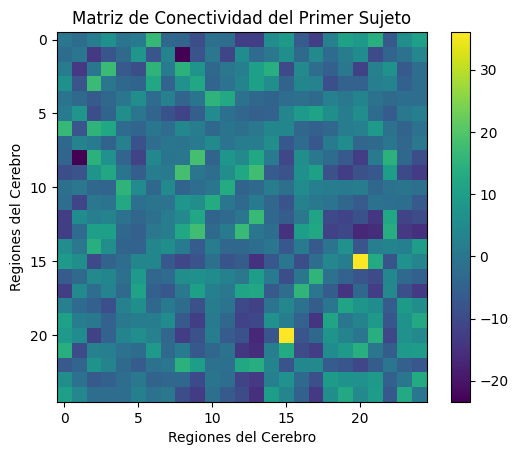

In [ ]:
# Seleccionar una sola matriz de conectividad (por ejemplo, la primera)
matriz_conectividad_individual = matrices_por_sujeto[0]

# Crear la visualización de la matriz de conectividad individual
plt.imshow(matriz_conectividad_individual, cmap='viridis', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Conectividad del Primer Sujeto')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

## Matriz promedio de matrices de correlacion

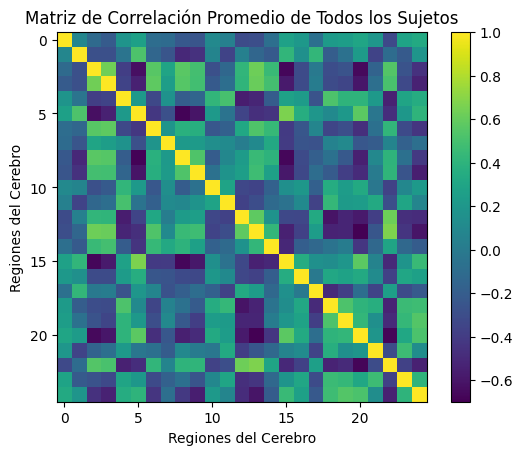

In [ ]:
# Calcular la matriz de correlación promedio de todos los sujetos
matriz_correlacion_promedio = np.mean([np.corrcoef(matriz) for matriz in matrices_por_sujeto], axis=0)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(matriz_correlacion_promedio, cmap='viridis', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Correlación Promedio de Todos los Sujetos')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

## Matriz promedio de matrices de conectividad

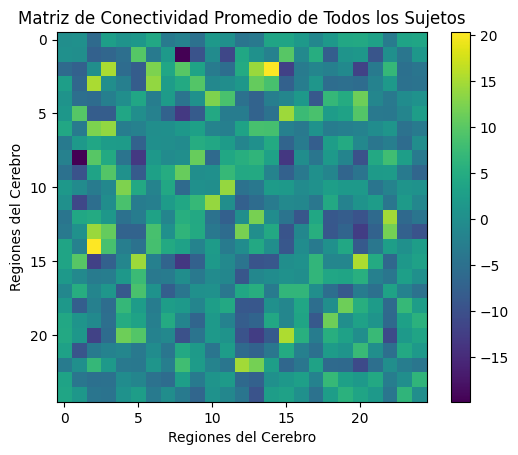

In [ ]:
# Calcular la matriz de conectividad promedio de todos los sujetos
matriz_conectividad_promedio = np.mean(matrices_por_sujeto, axis=0)

# Visualizar la matriz de conectividad promedio
plt.imshow(matriz_conectividad_promedio, cmap='viridis', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Conectividad Promedio de Todos los Sujetos')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

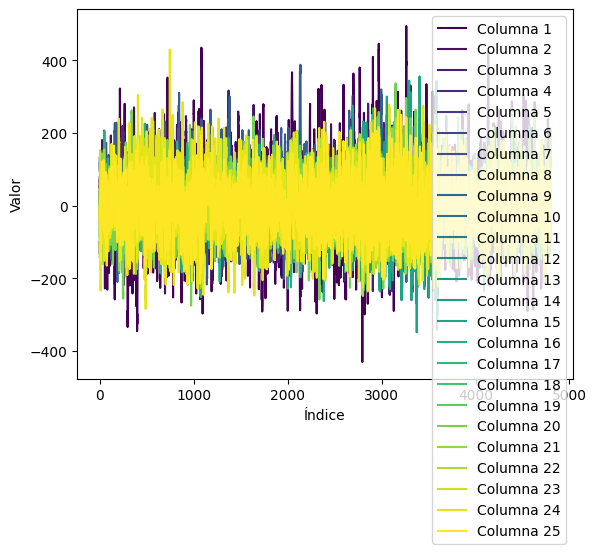

In [20]:
# @title fRMI

# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

# Crear un gráfico
plt.figure()

# Obtener el número de columnas y generar colores únicos para cada una
num_columnas = matrizrp.shape[1]
colores = plt.cm.viridis(np.linspace(0, 1, num_columnas))

# Iterar sobre cada columna de la matriz y graficarla como una curva con un color distinto
for i in range(num_columnas):
    plt.plot(matrizrp[:, i], color=colores[i], label=f'Columna {i+1}')

# Agregar etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()


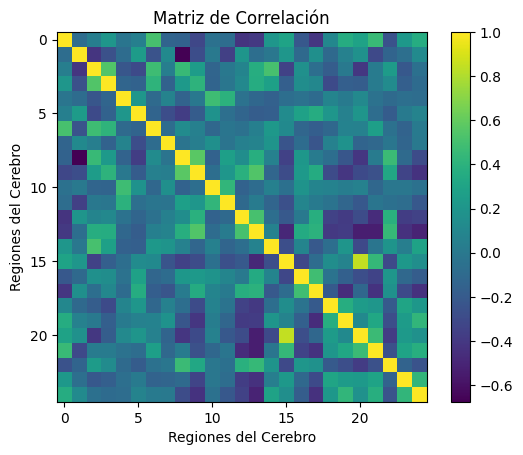

In [19]:

# @title Correlación

# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matriz_correlacion = np.corrcoef(matrizrp, rowvar=False)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(matriz_correlacion, cmap='viridis', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Correlación')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')


# Mostrar la visualización
plt.show()
